# Problem 2

## Problem Description
In this problem, you are given a dataset with two input features and one output. You will use a regression tree to make predictions for this data, evaluating each model on both training and testing data. Then, you will repeat this for multiple random forests.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
- RMSE function
- Create 4 decision tree prediction surface plots
- Create 4 random forest prediction surface plots
- Print RMSE for train and test data for 4 decision tree models
- Print RMSE for train and test data for 4 random forest models
- Answer the 3 questions posed throughout

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def make_plot(X,y,model, title=""):
    res = 100
    xrange = np.linspace(min(X[:,0]),max(X[:,0]),res)
    yrange = np.linspace(min(X[:,1]),max(X[:,1]),res)
    x1,x2 = np.meshgrid(xrange,yrange)
    xmesh = np.vstack([x1.flatten(),x2.flatten()]).T
    z = model.predict(xmesh).reshape(res,res)
    
    fig = plt.figure(figsize=(12,10))
    plt.subplots_adjust(left=0.3,right=0.9,bottom=.3,top=.9)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1,x2,z,cmap=cm.coolwarm,linewidth=0,alpha=0.9)
    ax.scatter(X[:,0],X[:,1],y,'o',c='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('y')
    plt.title(title)
    plt.show()

## Load the data
Use the `np.load()` function to load "w5-hw2-train.npy" (training data) and "w5-hw2-test.npy" (testing data). The first two columns of each are the input features. The last column is the output.
You should end up with 4 variables, input and output for each of the datasets.

In [2]:
# YOUR CODE GOES HERE
train_data = np.load(r"data\w5-hw2-train.npy")
train_X = train_data[:,:2]
train_y = train_data[:,2]

test_data = np.load(r"data\w5-hw2-test.npy")
test_X = test_data[:,:2]
test_y = test_data[:,2]


## RMSE function
Complete a root-mean-squared-error function, `RMSE(y, pred)`, which takes in two arrays, and computes the RMSE between them:

In [3]:
def RMSE(y, pred):
    # YOUR CODE GOES HERE
    return np.sqrt(np.sum((pred-y)**2)/len(y))

## Regression trees

Train 4 regression trees in sklearn, with max depth values [2,5,10,25]. Train your models on the training data.

Plot the predictions as a surface plot along with test points -- you can use the provided function: `make_plot(X, y, model, title)`.  
For each model, compute the train and test RMSE by calling your RMSE function. Print these results. 

Train RMSE for max depth 2: 35.47184989095342


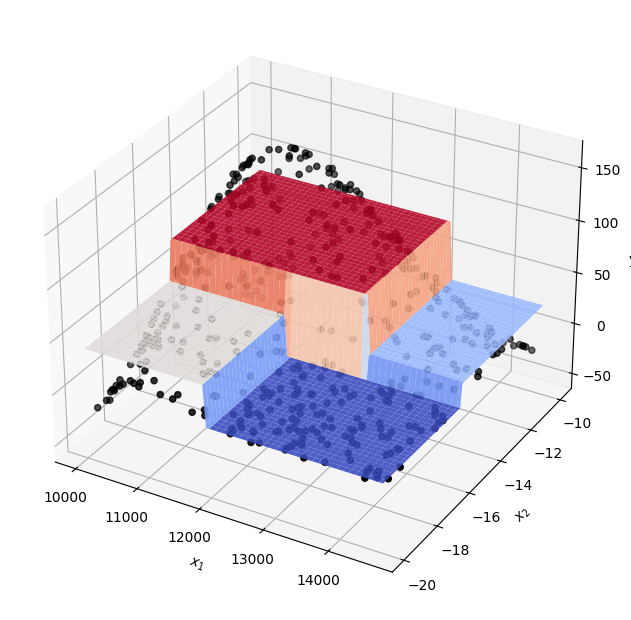

Test RMSE for max depth 2: 35.85992400163862
Train RMSE for max depth 5: 17.932673237502154


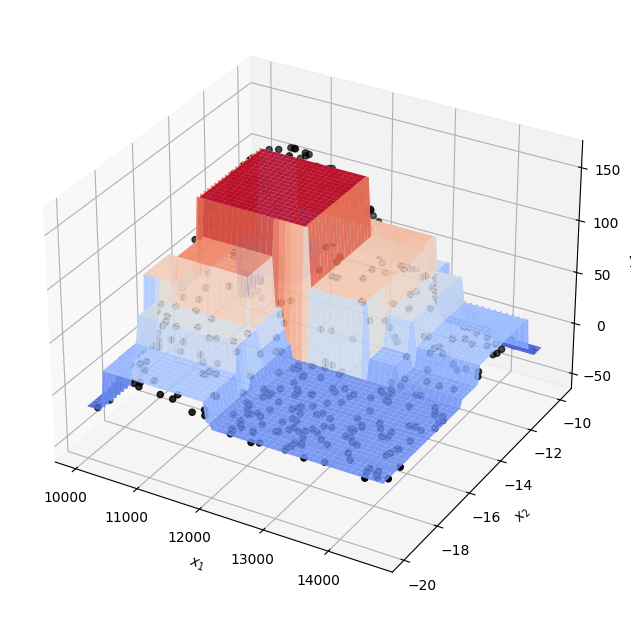

Test RMSE for max depth 5: 14.090506054369486
Train RMSE for max depth 10: 4.417134916147934


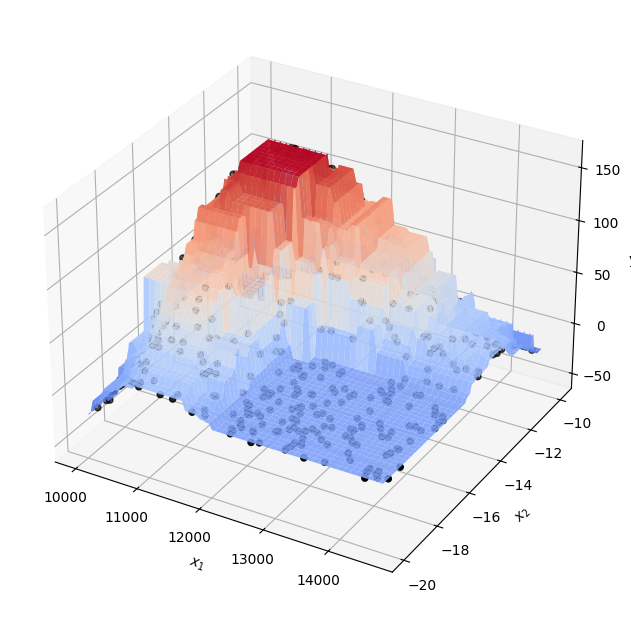

Test RMSE for max depth 10: 1.9758391949829948
Train RMSE for max depth 25: 0.0


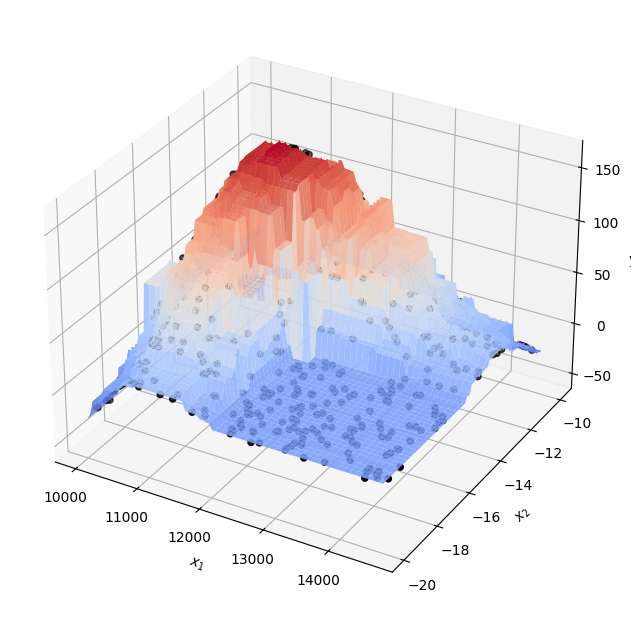

Test RMSE for max depth 25: 0.0


In [6]:
# YOUR CODE GOES HERE
for val in [2,5,10,25]:
    dt = DecisionTreeRegressor(max_depth=val)
    dt.fit(train_X,train_y)
    pred_train = dt.predict(train_X)
    print(f"Train RMSE for max depth {val}:",RMSE(train_y,pred_train))

    dt.fit(test_X,test_y)
    pred_test = dt.predict(test_X)
    make_plot(test_X,test_y,dt,)
    print(f"Test RMSE for max depth {val}:",RMSE(test_y,pred_test))

### Question
- Which of your regression trees performed the best on testing data?  

The one with the highest max_depth performs the best.

## Regression trees

Train 4 random forests in sklearn. For all of them, use the max depth values from your best-performing regression tree. The number of estimators should vary, with values [5, 10, 25, 100]. 

Plot the predictions as a surface plot along with test points.
Once again, for each model, compute the train and test RMSE by calling your RMSE function. Print these results.

In [7]:
# YOUR CODE GOES HERE

for val in [5,10,25,100]:
    rdf = RandomForestRegressor(max_depth=10, n_estimators=val)
    rdf.fit(train_X,train_y)
    pred_train = rdf.predict(train_X)
    print(f"Train RMSE for max depth {val}:",RMSE(train_y,pred_train))

    rdf.fit(test_X,test_y)
    pred_test = rdf.predict(test_X)
    print(f"Test RMSE for max depth {val}:",RMSE(test_y,pred_test))

Train RMSE for max depth 5: 3.971501014985073
Test RMSE for max depth 5: 3.645343984284402
Train RMSE for max depth 10: 3.4520719852755635
Test RMSE for max depth 10: 3.089469535445575
Train RMSE for max depth 25: 3.1337833596400704
Test RMSE for max depth 25: 2.977970057461398
Train RMSE for max depth 100: 3.115594261931982
Test RMSE for max depth 100: 2.7221395771349783


### Questions
- Which of your random forests performed the best on testing data?  


- How does the random forest prediction surface differ qualitatively from that of the decision tree? 

* The one with the highest max_depth performs the best.
* Random forest prediction generally has better performance than decision tree model as it is less prone to overfitting.